 # FINAL PROJECT!

 Thanks to the Data Extractors for the inital work on COVID19 Data!
 COVID19 cases and deaths impacct on Unemployment and Businesses



# Load Libraries






In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
%matplotlib inline
from sklearn.cluster import KMeans

# Import Data

In [6]:
NetChangeBusiness_20_21 = pd.read_csv("C:/Users/pammy/OneDrive/Documents/GitHub/FinalProject/NetBusinessChange_20_21.csv")
NetCovidDeaths_20_21= pd.read_csv("C:/Users/pammy/OneDrive/Documents/GitHub/FinalProject/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")  


# DATA WRANGLING AND CLEAN UP
Week 2


# VIEW DATA
Set Up display:



In [8]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# View Display
Net Change in Business Closings and Openings/Covid Cases and Deaths

In [9]:
display('NetChangeBusiness_20_21', 'NetCovidDeaths_20_21') 

,State,Bus_closing,Bus_opening
0,NY,0.53,0.47
1,FL,0.03,0.97
2,GA,0.66,0.34
3,MO,0.13,0.87
4,WA,0.47,0.53
5,CA,0.99,0.01
6,LA,0.55,0.45
7,HW,0.60,0.40
8,TX,0.47,0.53
9,National,0.10,0.99


# REMOVE UNWANTED DATA
#Remove Unwanted Column(s) For Each Dataset:

In [10]:
NetCovidDeaths= NetCovidDeaths_20_21[[ 'tot_cases','tot_death']]

In [39]:
#View New dfB
display('NetChangeBusiness_20_21.head()','NetCovidDeaths.head()')

NetChangeBusiness_20_21.head()
  State  Bus_closing  Bus_opening
0    NY         0.53         0.47
1    FL         0.03         0.97
2    GA         0.66         0.34
3    MO         0.87         0.13
4    WA         0.47         0.53

NetCovidDeaths.head()
   tot_cases  tot_death
0     163565       1907
1     197450       2850
2     100715       3765
3     107785        585
4         44          0

# INDEX - Set categorical info as column titles instead of numerical data.


In [16]:
NetChangeBusiness_I = NetChangeBusiness_20_21.set_index('State').T
NetChangeBusiness_I.head()

State,NY,FL,GA,MO,WA,CA,LA,HW,TX,National
Bus_closing,0.53,0.03,0.66,0.13,0.47,0.99,0.55,0.6,0.47,0.10
Bus_opening,0.47,0.97,0.34,0.87,0.53,0.01,0.45,0.4,0.53,0.99


# Data Explorations
#Week 3

# Histogram of Net Change in Business

array([[<AxesSubplot:title={'center':'NY'}>,
        <AxesSubplot:title={'center':'FL'}>,
        <AxesSubplot:title={'center':'GA'}>],
       [<AxesSubplot:title={'center':'MO'}>,
        <AxesSubplot:title={'center':'WA'}>,
        <AxesSubplot:title={'center':'CA'}>],
       [<AxesSubplot:title={'center':'LA'}>,
        <AxesSubplot:title={'center':'HW'}>,
        <AxesSubplot:title={'center':'TX'}>],
       [<AxesSubplot:title={'center':'National'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

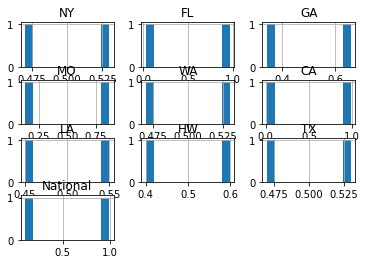

In [17]:
NetChangeBusiness_I.hist()

In [ ]:
Most of the USA's Businesses have opened back up according to these histograms. At one time early in the pandemic business closing were as steep as the recovering business opening late in the pandemic.

array([[<AxesSubplot:title={'center':'Bus_closing'}>,
        <AxesSubplot:title={'center':'Bus_opening'}>]], dtype=object)

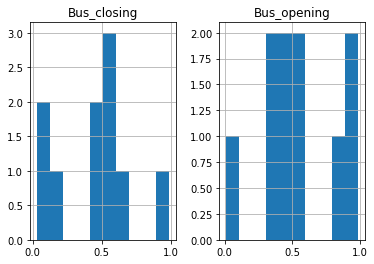

In [37]:
NetChangeBusiness_20_21.hist()

C:\Users\pammy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

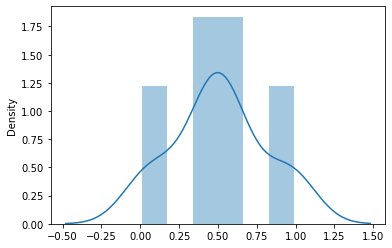

In [31]:
sns.distplot(NetChangeBusines_I)

This graph shows an almost bell curve from the rebound in businesses now in 2022.

# Net Covid Cases and Deaths 

array([[<AxesSubplot:title={'center':'tot_cases'}>,
        <AxesSubplot:title={'center':'tot_death'}>]], dtype=object)

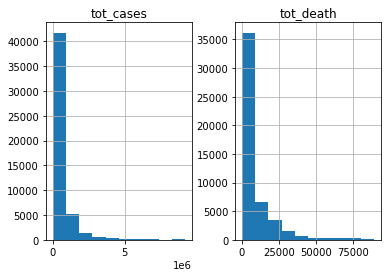

In [11]:
NetCovidDeaths.hist()

In [ ]:
This histogram shows a positively skewed bell curve and transformation is need it to move it to the center.

<AxesSubplot:xlabel='tot_cases', ylabel='Density'>

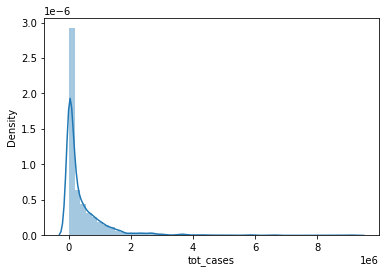

In [62]:
sns.distplot(NetCovidDeaths['tot_cases'])

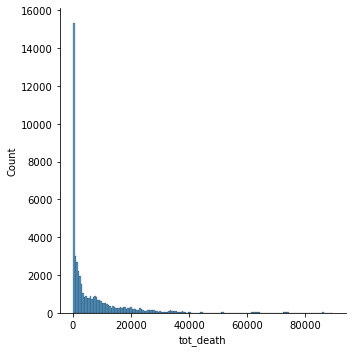

In [66]:
sns.displot(NetCovidDeaths['tot_death'])

NetCovidDeaths['tot_casessq'] = NetCovidDeaths['tot_cases'] ** 2

# Data Analysis
Week4

Perform k-Means
Clustering is a type of unsupervised learning in which similar data are grouped together. Clustering can be changed to as many as needed. 

In [52]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(NetCovidDeaths)



KMeans(n_clusters=2)

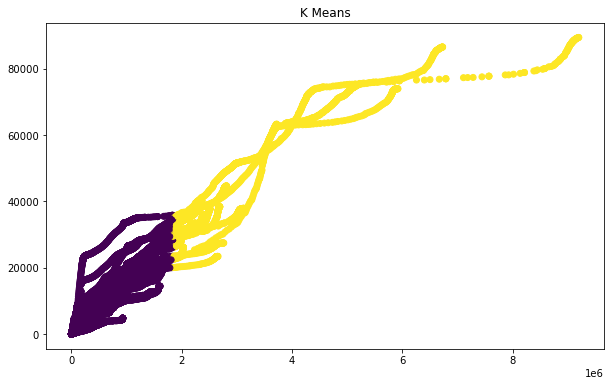

In [53]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(NetCovidDeaths['tot_cases'], NetCovidDeaths['tot_death'], c=kmeans.labels_, cmap='viridis')

The kmeans scatterplot is thick so little comparisions are given from this kmeans test.

In [54]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
kmeans.cluster_centers_

array([[3.16167665e+05, 5.47775660e+03, 1.59223528e+00],
       [3.36787325e+06, 4.71639621e+04, 2.18806306e+00]])

In [56]:
kmeans.inertia_

1.4916479958764666e+16

In [58]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(NetCovidDeaths)


KMeans(n_clusters=3)

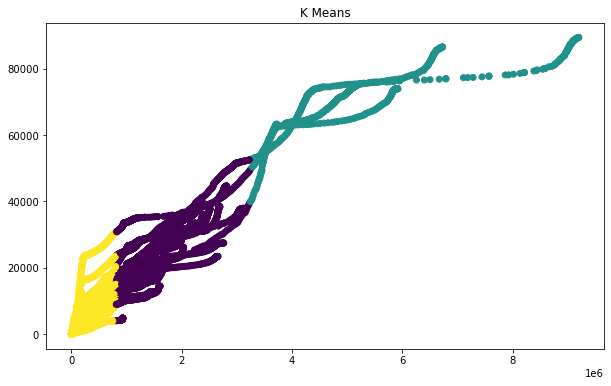

In [59]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(NetCovidDeaths['tot_cases'], NetCovidDeaths['tot_death'], c=kmeans.labels_, cmap='viridis')

In [60]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [61]:
kmeans.cluster_centers_

array([[1.44017898e+06, 2.25339515e+04, 1.77048780e+00],
       [5.03582051e+06, 6.89937539e+04, 2.56649215e+00],
       [1.77914419e+05, 3.26679592e+03, 1.57234647e+00]])

In [62]:
kmeans.inertia_

7318162717264955.0